In [21]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np
emotions_dict = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "neutral",
    5: "sad",
    6: "surprised"
}

model = load_model('best_model_TL.keras')
# start up the webcam
cap = cv2.VideoCapture(1)

# check if the webcam can be accessed
if not cap.isOpened():
    raise IOError("Cannot open webcam")

#take one frame from the webcam 
ret, frame = cap.read()

# Convert the frame to grayscale (if your model expects grayscale images)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Resize the frame to match the input size of the model (e.g., 48x48 for FER-2013)
resized_frame = cv2.resize(gray_frame, (48, 48))

# Normalize the frame
normalized_frame = resized_frame.astype('float32') / 255.0

# Expand dimensions to match the model's input format (batch_size, height, width, channels)
# Assuming the model expects a 4D input
expanded_frame = np.expand_dims(normalized_frame, axis=0)
expanded_frame = np.expand_dims(expanded_frame, axis=-1)

# Predict the emotion on the expanded frame
prediction = model.predict(expanded_frame)
# Assuming your model returns a list of predictions
emotion_label = np.argmax(prediction)

# Display the resulting frame with detected emotion
cv2.putText(frame, f'Emotion: {emotions_dict[emotion_label]}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# check if a frame has been captured successfully
if ret:
    # save the frame as an image file
    cv2.imwrite('webcam_image.jpg', frame)
else:
    print("Error: No frame captured")

# close the webcam
cap.release()
# close all openCV functions
cv2.destroyAllWindows()

1/1 [==============================] - 0s 273ms/step


In [23]:
import cv2
import mediapipe as mp

# initialise the codec and the video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

#initialise media pipe's face detection and video drawing 
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection()

cap = cv2.VideoCapture(1)

# check if the webcam can be accessed
if not cap.isOpened():
    raise IOError("Cannot open webcam")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

                # Convert the frame to grayscale (if your model expects grayscale images)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Resize the frame to match the input size of the model (e.g., 48x48 for FER-2013)
        resized_frame = cv2.resize(gray_frame, (48, 48))
        
        # Normalize the frame
        normalized_frame = resized_frame.astype('float32') / 255.0
        
        # Expand dimensions to match the model's input format (batch_size, height, width, channels)
        # Assuming the model expects a 4D input
        expanded_frame = np.expand_dims(normalized_frame, axis=0)
        expanded_frame = np.expand_dims(expanded_frame, axis=-1)
        
        # Predict the emotion on the expanded frame
        prediction = model.predict(expanded_frame)
        # Assuming your model returns a list of predictions
        emotion_label = np.argmax(prediction)
        
        # Display the resulting frame with detected emotion
        cv2.putText(frame, f'Emotion: {emotions_dict[emotion_label]}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


        # write the frame on to a file using the "out" video writer
        out.write(frame)


except KeyboardInterrupt:
    print("Stream stopped")
    
finally:
    # close webcam and all openCV functions
    cap.release()
    out.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step
Stream stopped


In [2]:
from tensorflow.keras.models import load_model
model = load_model('model_all.keras')

In [7]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Face Detection.
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
emotions_dict = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "neutral",
    5: "sad",
    6: "surprised"
}



# Initialize Video Capture and Video Writer.
cap = cv2.VideoCapture(1)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

if not cap.isOpened():
    raise IOError("Cannot open webcam")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB before processing.
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_detection.process(frame_rgb)

        if results.detections:
            for detection in results.detections:
                # Get the bounding box.
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, ic = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

                # Extract the face ROI.
                face_roi = frame[y:y+h, x:x+w]
            
                # In case you want to save or display the face ROI:
                # cv2.imwrite('face.jpg', face_roi)
                # cv2.imshow('Face ROI', face_roi)
                
                gray_frame = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
                
                # Draw the rectangle around the face on the frame.
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

                # Optionally: Use `mp_drawing.draw_detection` to draw the detection.
                # This will draw the full detection box, landmarks, and classification score.
                # mp_drawing.draw_detection(frame, detection)

                 # Resize the frame to match the input size of the model (e.g., 48x48 for FER-2013)
                resized_frame = cv2.resize(gray_frame, (48, 48))
                
                # Normalize the frame
                normalized_frame = resized_frame.astype('float32') / 255.0
                
                # Expand dimensions to match the model's input format (batch_size, height, width, channels)
                # Assuming the model expects a 4D input
                expanded_frame = np.expand_dims(normalized_frame, axis=0)
                expanded_frame = np.expand_dims(expanded_frame, axis=-1)
                
                # Predict the emotion on the expanded frame
                prediction = model.predict(expanded_frame)
                # Assuming your model returns a list of predictions
                emotion_label = np.argmax(prediction)
                
                # Display the resulting frame with detected emotion
                cv2.putText(frame, f'Emotion: {emotions_dict[emotion_label]}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show the frame with the face detection.
        cv2.imshow('Frame', frame)

        # Write the frame to the output file.
        out.write(frame)

        # Press 'q' to exit the loop.
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Stream stopped")

finally:
    # Release resources.
    cap.release()
    out.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step
Stream stopped


1/1 [==============================] - 0s 23ms/step


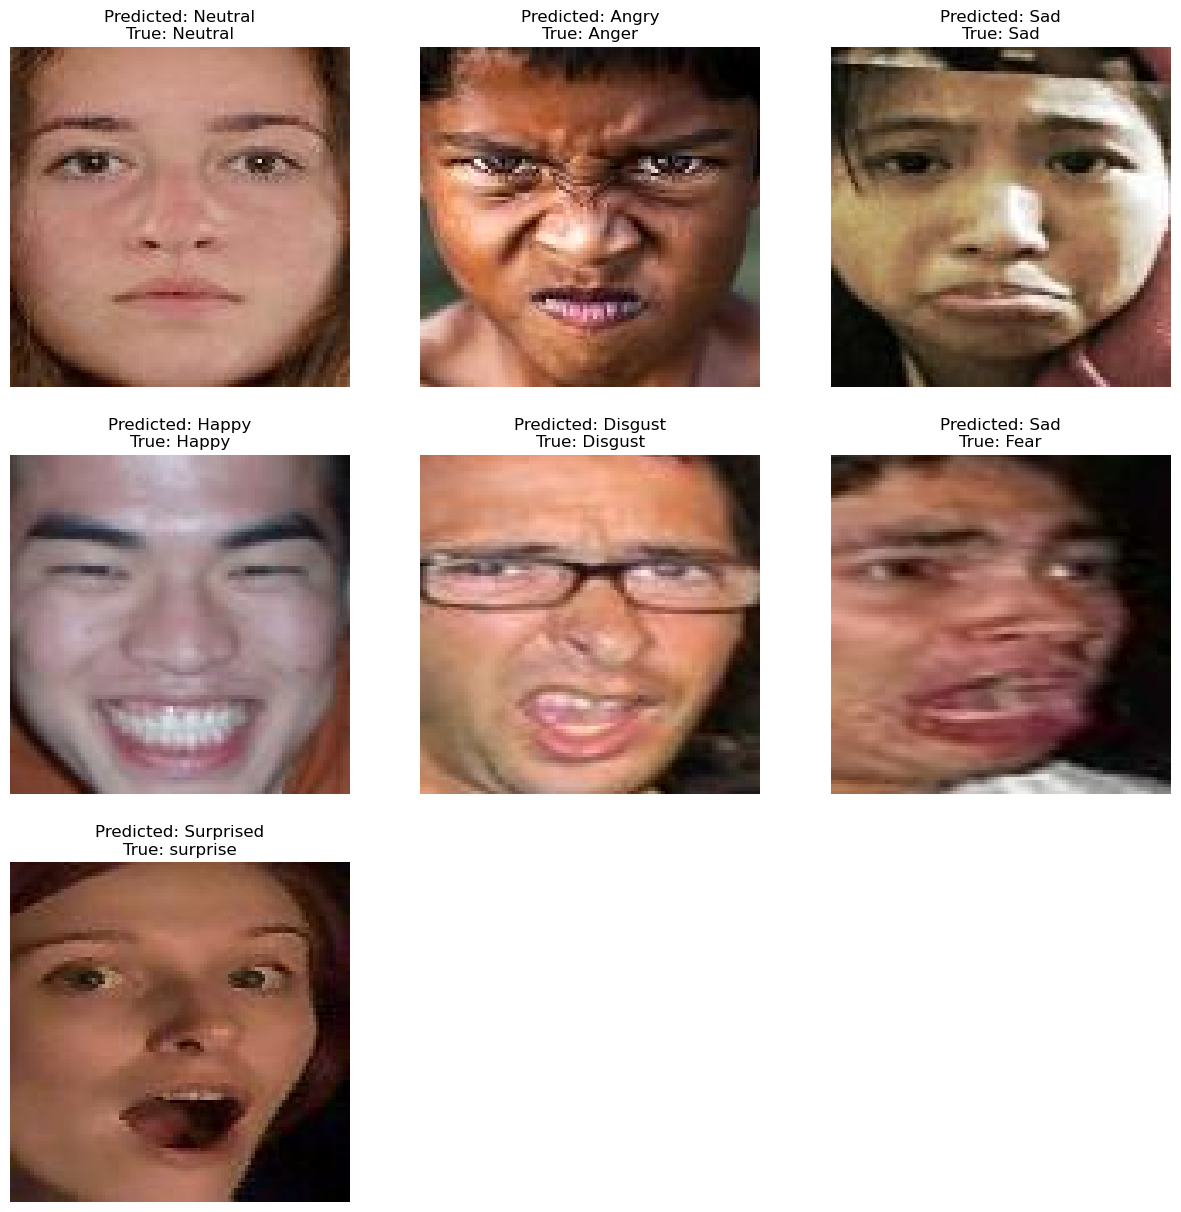

In [15]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = load_model('model_all.keras')

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if your model expects grayscale inputs
    img = cv2.resize(img, (48, 48))  # Resize to match the model's expected input dimensions
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Expand dims to match the model's expected input shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_emotion(img):
    prediction = model.predict(img)
    emotion_index = np.argmax(prediction)
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
    return emotions[emotion_index]

image_paths = ['neutural.jpg', 'anger.jpg', 'sad.jpg', 'Happy.jpg', 'disgust.jpg', 'fear.jpg', 'surprise.jpg']
true_labels = ['Neutral', 'Anger', 'Sad', 'Happy', 'Disgust', 'Fear', 'surprise']
# Setting up a 3x3 subplot layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the subplot parameters as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (image_path, true_label) in enumerate(zip(image_paths, true_labels)):
    img = preprocess_image(image_path)
    predicted_emotion = predict_emotion(img)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

    # Plotting the image
    axes[i].imshow(image)
    axes[i].set_title(f'Predicted: {predicted_emotion}\nTrue: {true_label}')
    axes[i].axis('off')

# Hide any unused axes if there are less than 9 images
for j in range(i + 1, 9):
    axes[j].axis('off')

plt.show()